# Simple Regularized Lasso Regression
> L1 Regularization

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import pylab as py
from sklearn import linear_model

In [98]:
data = pd.read_csv("Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [99]:
# x = data[['Length1','Length2','Length3','Height','Width']]
x = data[['Length1']]
y = data['Weight']

In [100]:
rdg = Ridge(alpha = 50)
rdg.fit(x, y)
rdg.score(x,y)

0.8385195905503031

In [101]:
rdg.intercept_, rdg.coef_

(-459.6580050334617, array([32.68864515]))

In [102]:
y_pred = rdg.predict(x)

Text(0, 0.5, 'Weight cm')

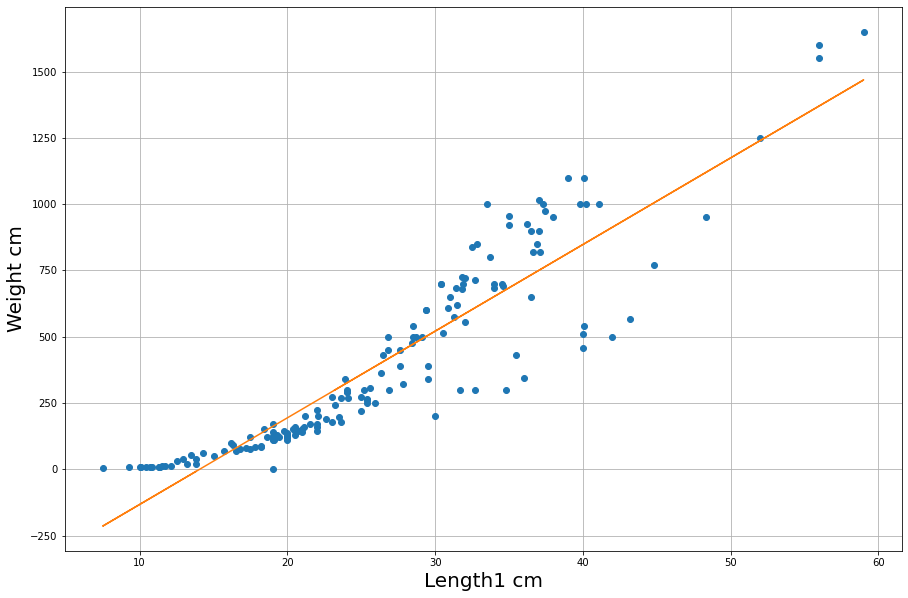

In [103]:
fig = plt.figure(figsize=(15,10))
plt.plot(data['Length1'],data['Weight'],'o')
plt.plot(data['Length1'],y_pred)
plt.grid()
plt.xlabel("Length1 cm", fontsize=20)
plt.ylabel("Weight cm",  fontsize=20)

In [104]:
from sklearn.metrics import mean_squared_error

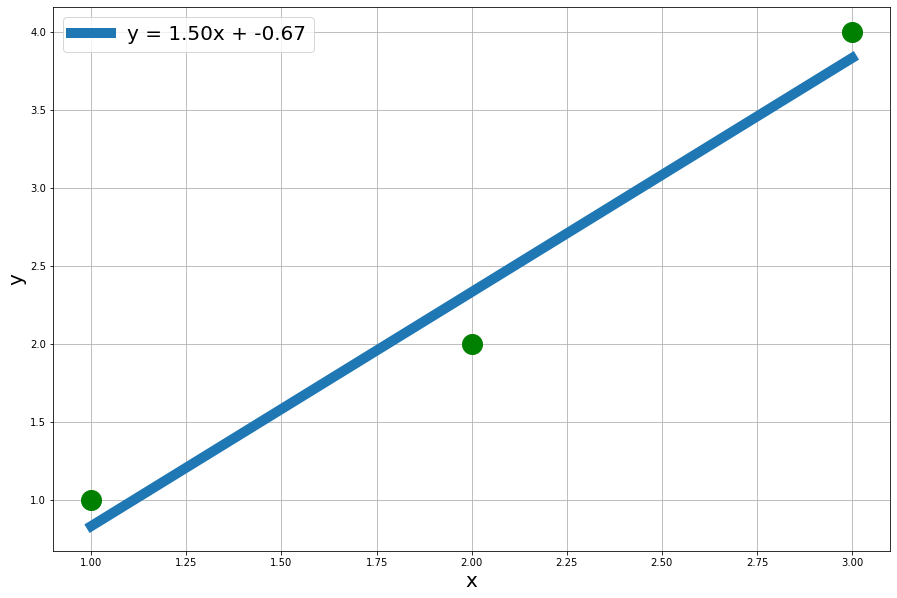

In [105]:
# df = pd.DataFrame.from_dict({
#     'x': [1,2,3,4,5,6,7,8,9,10], 
#     'y': [1,2,4,2,6,5,7,8,10,9]})

df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})


x = df[['x']]
y = df.y
model = linear_model.LinearRegression()
model.fit(x, y)
model.score(x,y)
y_pred = model.predict(x)

fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred,  linewidth=10, label = "y = {:.2f}x + {:.2f}".format(float(model.coef_),float(model.intercept_)))    
plt.grid()
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)

In [106]:
mse = mean_squared_error(y, y_pred)
mse

0.05555555555555558

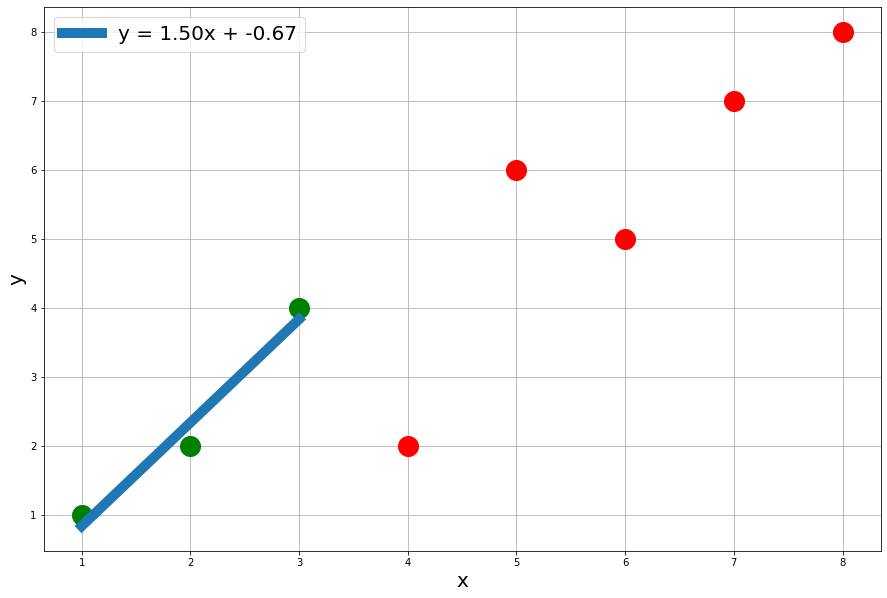

In [107]:
# df = pd.DataFrame.from_dict({
#     'x': [1,2,3,4,5,6,7,8], 
#     'y': [1,2,4,2,6,5,7,8]})

df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})

x = df[['x']]
y = df.y
model = linear_model.LinearRegression()
model.fit(x, y)
model.score(x,y)
y_pred = model.predict(x)

fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred,  linewidth=10, label = "y = {:.2f}x + {:.2f}".format(float(model.coef_),float(model.intercept_)))    

dft = pd.DataFrame.from_dict({
    'x': [4,5,6,7,8], 
    'y': [2,6,5,7,8]})
plt.plot(dft['x'],dft['y'],'o',color="red", markersize=20)

plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)
plt.grid()


In [108]:
mean_squared_error(model.predict(dft[['x']]), np.array(dft.y))

8.411111111111106

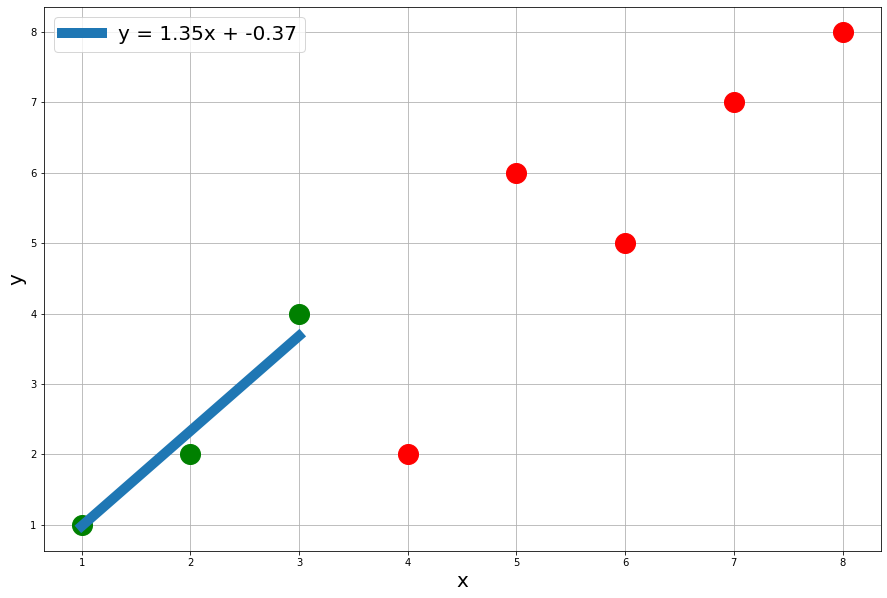

In [109]:
df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})

x = df[['x']]
y = df.y

las = Lasso(alpha = 0.1)
las.fit(x, y)

y_pred = las.predict(x)
fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred, linewidth=10,label = "y = {:.2f}x + {:.2f}".format(float(las.coef_),float(las.intercept_)))
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)

dft = pd.DataFrame.from_dict({
    'x': [4,5,6,7,8], 
    'y': [2,6,5,7,8]})
plt.plot(dft['x'],dft['y'],'o',color="red", markersize=20)

plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)
plt.grid()

In [110]:
mean_squared_error(las.predict(dft[['x']]), np.array(dft.y))

5.416111111111113

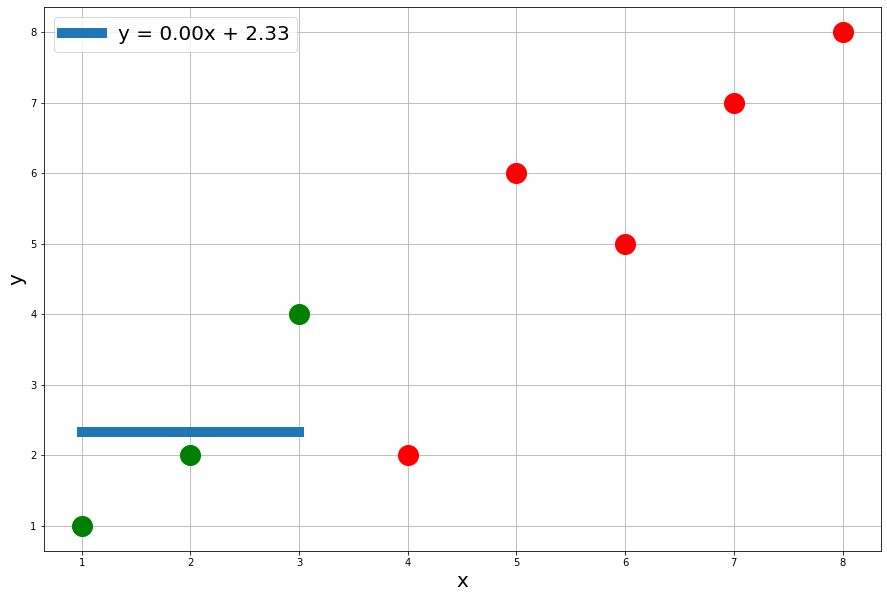

In [111]:
df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})


x = df[['x']]
y = df.y

las = Lasso(alpha = 100)
las.fit(x, y)

y_pred = las.predict(x)

fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred, linewidth=10,label = "y = {:.2f}x + {:.2f}".format(float(las.coef_),float(las.intercept_)))
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)

dft = pd.DataFrame.from_dict({
    'x': [4,5,6,7,8], 
    'y': [2,6,5,7,8]})
plt.plot(dft['x'],dft['y'],'o',color="red", markersize=20)

plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)
plt.grid()

In [112]:
from sklearn.linear_model import LassoCV

In [113]:
df = pd.DataFrame.from_dict({
    'x': [1,2,3,4,5,6], 
    'y': [1,2,4,7,5,8]})


x = df[['x']]
y = df.y

In [114]:
alphas = [ 0.1,0.5,1]

for a in alphas:
    model = Lasso(alpha=a, normalize=True).fit(x,y) 
    score = model.score(x, y)
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred) 
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}".format(a, score, mse))

Alpha:0.100000, R2:0.832, MSE:1.05
Alpha:0.500000, R2:0.602, MSE:2.49
Alpha:1.000000, R2:0.000, MSE:6.25


In [116]:
lasso_cv = LassoCV(alphas=alphas)
lasso_model = lasso_cv.fit(x,y)
print(lasso_model.alpha_)

0.1
